# Prophet Model


In [4]:
!pip install convertdate

In [5]:
!pip install fbprophet

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

import requests
from bs4 import BeautifulSoup
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
import seaborn as sns
import plotly.express as px

In [15]:
df = pd.read_csv('data/processed_data/covid-19-state-level.csv', index_col=0)

In [46]:
def prediction(state, data, periods, columns, test_size=None):
    # Function that takes in the data frame, storeID, and number of future period forecast
    # The function then generates date/columns columns in Prophet format
    # The function then makes time series predictions
    data = data[data['state'] == state]
    if test_size is not None:
        test_data = data[-test_size:]
        data = data[:-test_size]
    data = data[['date', columns]].rename(columns={'date': 'ds', columns : 'y'})
    data = data.sort_values('ds')
    city = state + '_' + columns
    # 
    model = Prophet()
    model.fit(data)
    # 
    future   = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    # 
    figure    = model.plot(forecast, xlabel='COVID-19 Cases', ylabel=city)
    figure.savefig(columns + '_' + state + '_prophetplot.png')
    # 
    figure2  = model.plot_components(forecast)
    figure2.savefig(columns + '_trend_' + state + '_prophetplot.png')
    return model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


            date     state    retail  grocery_and_pharmacy      parks  \
2516  2020-03-10  New York  4.193548              4.677419  10.555556   
2517  2020-03-11  New York  6.661290             10.048387  24.884615   
2518  2020-03-12  New York  9.677419             26.080645  19.166667   
2519  2020-03-13  New York  1.338710             26.758065  10.709677   
2520  2020-03-14  New York  1.741935             27.564516  42.035714   

      transit_stations  workplaces  residential  fips  cases  deaths  
2516          0.312500    0.870968     0.830508  36.0  173.0     0.0  
2517         -0.843750    0.629032     0.406780  36.0  217.0     0.0  
2518         -1.363636    0.112903     0.508475  36.0  326.0     0.0  
2519         -9.114286   -4.193548     3.322034  36.0  421.0     0.0  
2520         -8.727273    0.112903     2.526316  36.0  610.0     2.0  
            date     state     retail  grocery_and_pharmacy      parks  \
2521  2020-03-15  New York  -0.258065             25.475410  

AttributeError: 'NoneType' object has no attribute 'history'

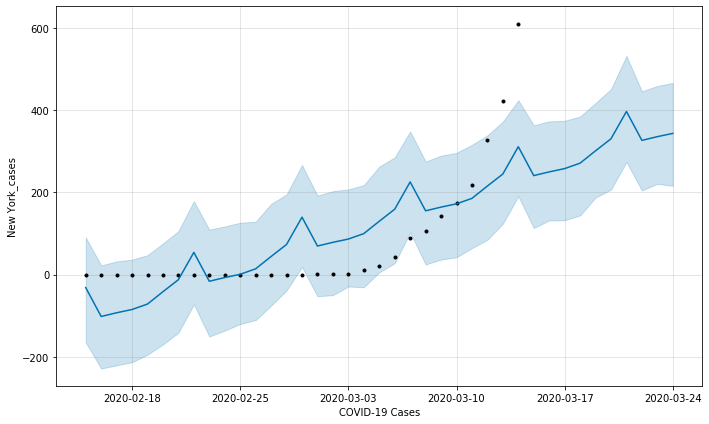

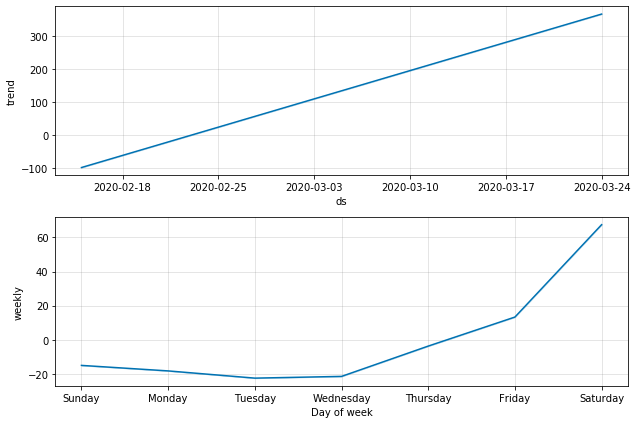

In [49]:
model = prediction('New York', df, 10, 'cases', 60)

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

df_cv.head()